<a href="https://colab.research.google.com/github/chandra-sekar-1983/eda/blob/master/FeatureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Why do we select variables? - For production: Fewer variables mean smaller client input requirements (e.g. customers filling out a form on a website or mobile app), and hence less code for error handling. This reduces the chances of introducing bugs.**

**For model performance: Fewer variables mean simpler, more interpretable, better generalizing models**

**We will select variables using the Lasso regression: Lasso has the property of setting the coefficient of non-informative variables to zero. This way we can identify those variables and remove them from our final model.**

1.Corrleation - For continuous variables - Remove multicollinear variables

2.Chi squared test and anova - for categorical variables - Remove low variance features

3.Automatic feature selection using stepwise regression

4.Machine learning model

In [0]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt

# to build the models
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [29]:
# load the train and test set with the engineered variables

# we built and saved these datasets in the previous lecture.
# If you haven't done so, go ahead and check the previous notebook
# to find out how to create these datasets

X_train = pd.read_csv('/content/xtrain1.csv')
X_test = pd.read_csv('/content/xtest1.csv')

X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,931,0.000000,0.75,0.461171,0.377048,1.0,0.5,0.333333,1.000000,1.0,0.0,0.0,0.863636,0.4,1.0,0.75,0.6,0.777778,0.50,0.014706,0.049180,0.0,0.0,0.9,0.9,0.000000,0.00000,0.666667,1.0,1.0,0.75,0.75,0.75,1.000000,0.002835,0.666667,0.0,0.673479,0.239935,1.0,1.00,1.0,1.0,0.559760,0.0,0.0,0.523250,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.000000,0.2,0.8,0.018692,1.000000,0.75,0.430183,0.666667,1.0,1.0,0.116686,0.032907,0.0,0.000000,0.0,0.0,0.0,1.00,1.0,0.0,0.545455,0.75,0.666667,0.75,12.211060,0.0,0.0,0.0
1,657,0.000000,0.75,0.456066,0.399443,1.0,0.5,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.444444,0.75,0.360294,0.049180,0.0,0.0,0.5,0.6,0.666667,0.03375,0.666667,1.0,0.5,0.50,0.75,0.25,0.666667,0.142807,0.666667,0.0,0.114724,0.172340,1.0,1.00,1.0,1.0,0.434539,0.0,0.0,0.406196,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.250000,1.0,0.000000,0.2,0.8,0.457944,0.666667,0.25,0.220028,0.666667,1.0,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.25,1.0,0.0,0.636364,0.50,0.666667,0.75,11.887931,0.0,0.0,0.0
2,46,0.588235,0.75,0.394699,0.347082,1.0,0.5,0.000000,0.333333,1.0,0.0,0.0,1.000000,0.4,1.0,1.00,0.6,0.888889,0.50,0.036765,0.098361,0.5,0.0,0.3,0.3,0.666667,0.25750,1.000000,1.0,1.0,1.00,0.75,0.25,1.000000,0.080794,0.666667,0.0,0.601951,0.286743,1.0,1.00,1.0,1.0,0.627205,0.0,0.0,0.586296,0.333333,0.0,0.666667,0.0,0.250,0.333333,1.000000,0.333333,1.0,0.333333,0.8,0.8,0.046729,0.666667,0.50,0.406206,0.666667,1.0,1.0,0.228705,0.149909,0.0,0.000000,0.0,0.0,0.0,1.00,1.0,0.0,0.090909,1.00,0.666667,0.75,12.675764,0.0,0.0,0.0
3,1349,0.000000,0.75,0.440313,0.493677,1.0,0.5,0.666667,0.666667,1.0,0.0,0.0,0.500000,0.4,1.0,0.75,0.6,0.666667,0.50,0.066176,0.163934,0.0,0.0,0.9,0.9,0.000000,0.00000,0.666667,1.0,1.0,0.75,0.75,1.00,1.000000,0.255670,0.666667,0.0,0.018114,0.242553,1.0,1.00,1.0,1.0,0.566920,0.0,0.0,0.529943,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.250000,1.0,0.333333,0.4,0.8,0.084112,0.666667,0.50,0.362482,0.666667,1.0,1.0,0.469078,0.045704,0.0,0.000000,0.0,0.0,0.0,1.00,1.0,0.0,0.636364,0.25,0.666667,0.75,12.278393,1.0,0.0,0.0
4,56,0.000000,0.75,0.577658,0.402702,1.0,0.5,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.555556,0.50,0.323529,0.737705,0.0,0.0,0.5,0.7,0.666667,0.17000,0.333333,1.0,0.5,0.50,0.75,0.25,0.333333,0.086818,0.666667,0.0,0.434278,0.233224,1.0,0.75,1.0,1.0,0.549026,0.0,0.0,0.513216,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.333333,0.416667,1.0,0.333333,0.8,0.8,0.411215,0.666667,0.50,0.406206,0.666667,1.0,1.0,0.000000,0.000000,0.0,0.801181,0.0,0.0,0.0,1.00,1.0,0.0,0.545455,0.50,0.666667,0.75,12.103486,0.0,0.0,0.0


**1) Correlation - For continous variables**

In [0]:
# modify the numeric-var in the below
numeric_var=["LotFrontage","LotArea","1stFlrSF","2ndFlrSF"]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


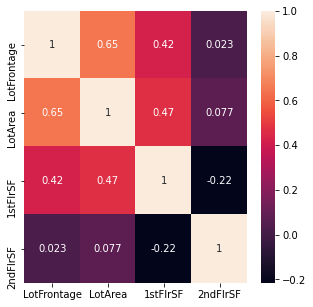

In [41]:
import seaborn as sns
corr= X_train[numeric_var].corr() # We already examined SalePrice correlations
plt.figure(figsize=(5, 5))

sns.heatmap(corr, annot = True)

2.Understanding Mean sales price of every sub category and use statiscal test to find if any significance difference is there or not.

In [0]:
# modify the categorical-var in the below - modify the columns based on actual
categorical_col=["MSZoning","Street","LotShape","LandContour"]

NameError: ignored

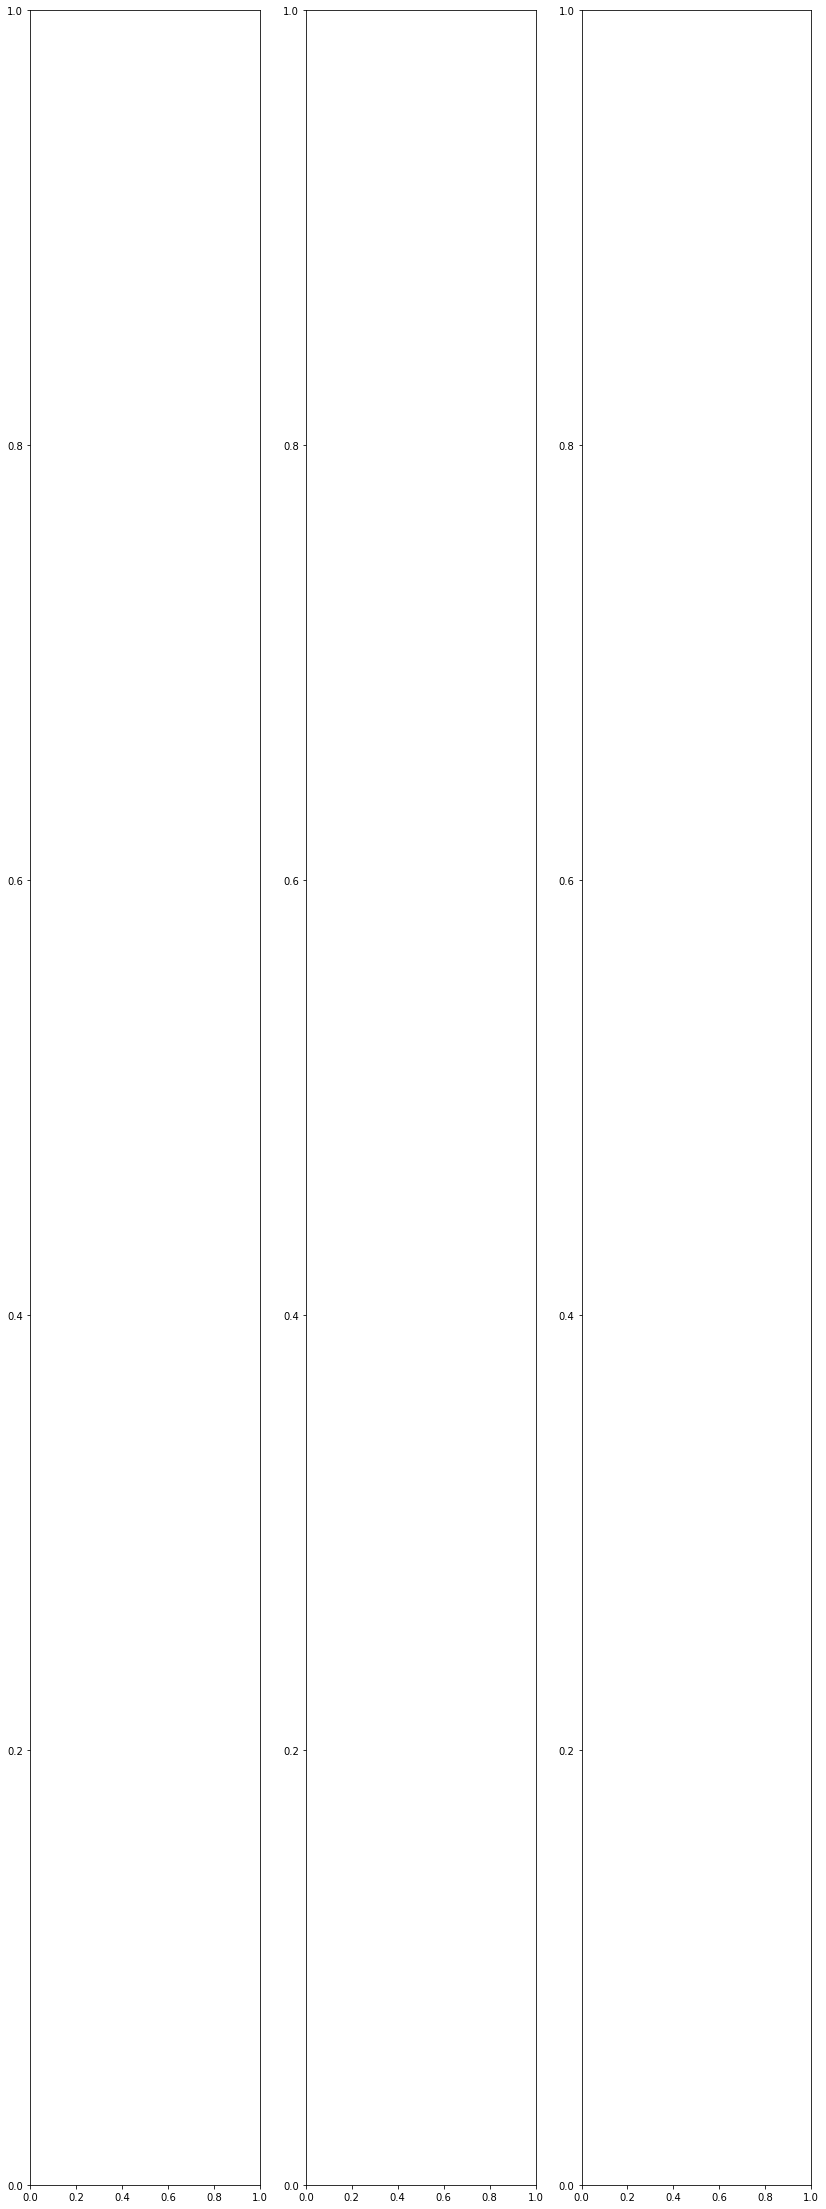

In [49]:
### Plotting distribution of categorical variable variables - 
fig, ax = plt.subplots(round(len(categorical_col) / 3), 3, figsize = (14, 40))

for i, ax in enumerate(fig.axes):
  
    if i < len(categorical_col) :
        sns.boxplot(x=categorical_col[i],y='SalePrice', data=df2, ax=ax)

NameError: ignored

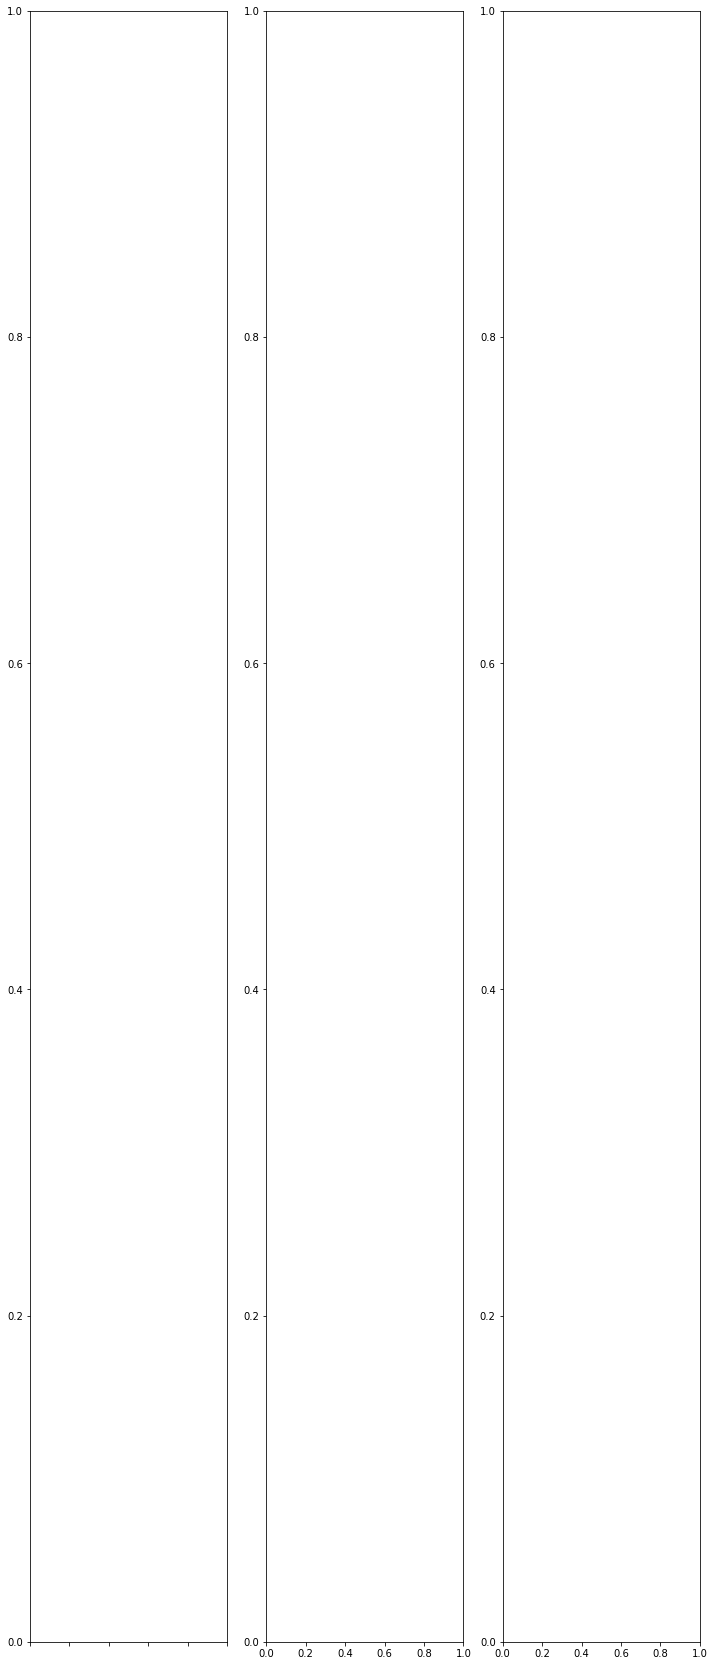

In [50]:
fig, axes = plt.subplots(round(len(categorical_col) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(categorical_col):
    #for col in categorical_col:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=categorical_col[i], alpha=0.7, data=df2, ax=ax)

fig.tight_layout()

Applying statistical Chi square to check if there is 

---

signifcant difference between sub categories of categorical variables

In [51]:
from scipy.stats import chi2_contingency
for category in two_categories:
  alpha=0.05
  print("The category is ",category)
  val1,val2=(df2[category].unique()[0]),(df2[category].unique()[1])
  
  stat, p, dof, expected = chi2_contingency(df2[output_col][df2[category]==val1],df2[output_col][df2[category]==val2])
  
  print('significance=%.3f, p=%.3f' % (alpha, p))
  if p <= alpha:
    print('Variables are associated (reject H0)')
  else:
    print('Variables are not associated(fail to reject H0)')

NameError: ignored

In [0]:

### implementation is pending 

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols
# reshape the d dataframe suitable for statsmodels package 
d_melt = pd.melt(d.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
print(d_melt)
# replace column names
d_melt.columns = ['index', 'treatments', 'value']
print(d_melt.columns)
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table
df3=df2
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols
d_melt = df3["LandSlope"]

# Ordinary Least Squares (OLS) model
model = ols(df3["LandSlope"],df3["SalePrice"]).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table
tukey test pending
##https://reneshbedre.github.io/blog/anova.html



In [44]:
# capture the target (remember that the target is log transformed)
y_train = X_train['SalePrice']
y_test = X_test['SalePrice']

# drop unnecessary variables from our training and testing sets
X_train.drop(['Id', 'SalePrice'], axis=1, inplace=True)
X_test.drop(['Id', 'SalePrice'], axis=1, inplace=True)

KeyError: ignored

Feature Selection
Let's go ahead and select a subset of the most predictive features. There is an element of randomness in the Lasso regression, so remember to set the seed.

In [31]:
# We will do the model fitting and feature selection
# altogether in a few lines of code

# first, we specify the Lasso Regression model, and we
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then we use the selectFromModel object from sklearn, which
# will select automatically the features which coefficients are non-zero

# remember to set the seed, the random state in this function
sel_ = SelectFromModel(Lasso(alpha=0.005, random_state=0))

# train Lasso model and select features
sel_.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [32]:
# let's visualise those features that were selected.
# (selected features marked with True)

sel_.get_support()

array([ True,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False,  True,  True,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [33]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feats = X_train.columns[(sel_.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feats)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 82
selected features: 20
features with coefficients shrank to zero: 62


In [34]:
  # print the selected features
selected_feats

Index(['MSSubClass', 'MSZoning', 'Neighborhood', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'CentralAir',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'PavedDrive'],
      dtype='object')

Identify the selected variables¶


In [35]:

# this is an alternative way of identifying the selected features
# based on the non-zero regularisation coefficients:

selected_feats = X_train.columns[(sel_.estimator_.coef_ != 0).ravel().tolist()]

selected_feats

Index(['MSSubClass', 'MSZoning', 'Neighborhood', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'CentralAir',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'PavedDrive'],
      dtype='object')

In [0]:
pd.Series(selected_feats).to_csv('selected_features.csv', index=False)
